<a href="https://colab.research.google.com/github/Victorjeferson98/c-digos/blob/main/pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyod -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# importando dados do repositorio
!git clone https://github.com/jadsomjose/data_well.git

Cloning into 'data_well'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 76 (delta 24), reused 54 (delta 14), pack-reused 0
Unpacking objects: 100% (76/76), 12.69 MiB | 5.04 MiB/s, done.


In [3]:
#instalando bibliotecas
!pip install lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.7 MB/s eta 0:00:00


In [4]:
#importando bibliotecas
import pandas as pd
import numpy as np
import lasio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px
from pyod.models.knn import KNN

In [5]:
# carregando dados
norne1 = lasio.read('data_well/dado_norne/660810-B-4AH.las').df()
norne2 = lasio.read('data_well/dado_norne/660810-C-1H.las').df()
norne3 = lasio.read('data_well/dado_norne/660810-C-2H.las').df()
norne4 = lasio.read('data_well/dado_norne/660810-C-3H.las').df()
norne5 = lasio.read('data_well/dado_norne/660810-C-4AH.las').df()
norne6 = lasio.read('data_well/dado_norne/660810-D-4H.las').df()
norne7 = lasio.read('data_well/dado_norne/660810-E-3H.las').df()

In [6]:
#visualização
norne1

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH
DEPTH,,,,,,,,,,,
1300.125,1285.3834,-1254.3834,NaN,NaN,NaN,NaN,0.4772,NaN,NaN,NaN,NaN
1300.250,1285.5034,-1254.5034,NaN,NaN,NaN,NaN,0.4769,NaN,NaN,NaN,NaN
1300.375,1285.6235,-1254.6235,NaN,NaN,NaN,NaN,0.4770,NaN,NaN,NaN,NaN
1300.500,1285.7435,-1254.7435,NaN,NaN,NaN,NaN,0.4767,NaN,NaN,NaN,NaN
1300.625,1285.8636,-1254.8636,NaN,NaN,NaN,NaN,0.4758,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3919.000,2841.1301,-2810.1301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3919.125,2841.2202,-2810.2202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3919.250,2841.3101,-2810.3101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# mesclando dados e preenchendo com valores faltantes
norne1 = norne1.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne2 = norne2.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
#norne3 = norne3.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne4 = norne4.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne5 = norne5.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne6 = norne6.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne7 = norne7.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])

In [8]:
norne1

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH
DEPTH,,,,,,,,,,,
3196.000,2575.1772,-2544.1772,86.6725,172.2732,96.6444,1.7680,0.2576,0.0771,2.5069,0.5073,0.4072
3196.125,2575.2207,-2544.2207,90.5224,171.0457,93.0198,0.6011,0.2458,0.0350,2.6117,0.9880,0.3669
3196.250,2575.2642,-2544.2642,91.7761,170.0313,91.9090,0.6303,0.2417,0.0369,2.6042,0.8607,0.3545
3196.375,2575.3079,-2544.3079,93.3359,169.1582,91.9182,0.8857,0.2404,0.0501,2.5733,0.7056,0.3546
3196.500,2575.3513,-2544.3513,93.9531,168.7450,92.3022,1.2757,0.2399,0.0643,2.5360,0.5439,0.3589
...,...,...,...,...,...,...,...,...,...,...,...
3882.375,2814.7883,-2783.7883,93.0182,167.9510,58.4511,422.6047,0.2140,0.2649,2.1890,0.6156,0.0010
3882.500,2814.8784,-2783.8784,92.4579,167.9510,69.3898,373.2987,0.2152,0.2621,2.1899,0.5570,0.0101
3882.625,2814.9683,-2783.9683,92.3088,167.9510,75.1288,404.5169,0.2169,0.2639,2.1847,0.5267,0.0113


In [9]:
norne1.describe()

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000,5418.000000,5429.000000,5418.000000,5429.000000,5418.000000,5429.000000
mean,2666.661961,-2635.661961,95.464372,165.603444,74.649311,339.491285,0.259678,0.218848,2.255990,0.420095,0.164645
std,63.006896,63.006896,8.691064,13.236446,24.922240,614.956394,0.048151,0.073461,0.160132,0.322875,0.152807
min,2575.177200,-2784.147900,67.823500,111.268300,36.834800,0.000300,0.094600,0.001000,1.870600,0.060000,0.001000
25%,2618.838900,-2679.325900,88.973700,158.410700,56.847100,3.670025,0.242700,0.177300,2.153600,0.170625,0.053300
50%,2647.839400,-2616.839400,97.092000,169.664900,66.139400,72.631050,0.259000,0.243000,2.214500,0.248550,0.122600
75%,2710.325900,-2587.838900,102.137000,174.716900,83.816900,350.818800,0.278800,0.271800,2.344200,0.687900,0.216400
max,2815.147900,-2544.177200,119.429100,213.053300,159.399100,5418.961400,0.439400,0.338400,3.118200,1.000000,0.738000


In [10]:
VSH = norne1.loc[:, ['VSH']]
NPHI = norne1.loc[:, ['NPHI']]
RHOB = norne1.loc[:, ['RHOB']]
DTS = norne1.loc[:, ['DTS']]
DT = norne1.loc[:, ['DT']]

In [11]:
# cálculo de VP E VS
norne1['VP'] = (0.3048/norne1['DT'])*10**3
norne1['VS'] = (0.3048/norne1['DTS'])*10**3
vp1=norne1['VP'];
vs1=norne1['VS'];

vs1;

<ipython-input-11-f2049eedec20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norne1['VP'] = (0.3048/norne1['DT'])*10**3
<ipython-input-11-f2049eedec20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norne1['VS'] = (0.3048/norne1['DTS'])*10**3


In [12]:
# indexando
depth = norne1.index

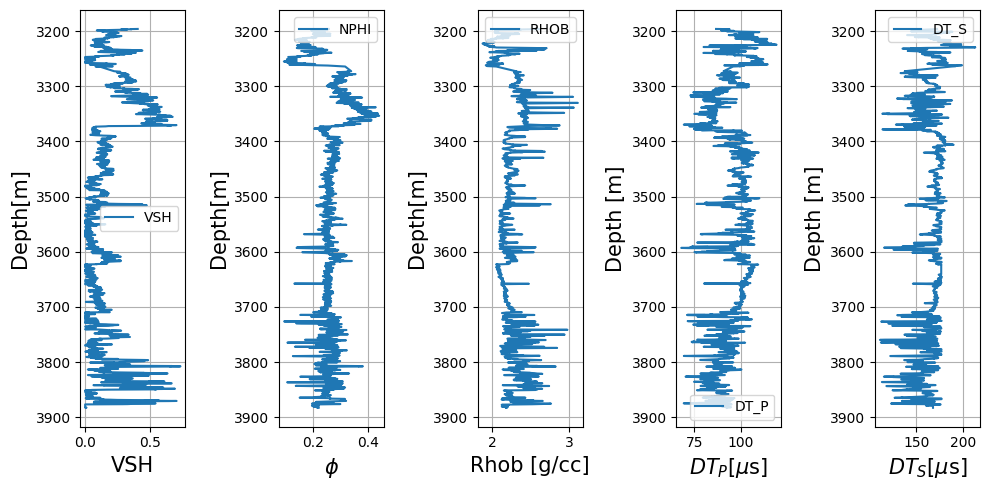

In [13]:
# visualizando gráficos

#tamanho do gráfico
f = plt.figure(figsize=(10,5))

# gráfico de VSH
ax1 = f.add_subplot(151)
ax1.plot(np.array(VSH),np.array(depth), label= 'VSH')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('VSH', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

# gráfico de NPHI
ax2 = f.add_subplot(152)
ax2.plot(np.array(NPHI),np.array(depth), label= 'NPHI')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('$\phi$', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

# gráfico de RHOB
ax3 = f.add_subplot(153)
ax3.plot(np.array(RHOB),np.array(depth), label= 'RHOB')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Rhob [g/cc]', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

# gráfico de DT P
ax4 = f.add_subplot(154)
ax4.plot(np.array(DT),np.array(depth), label= 'DT_P')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', size=15)
plt.xlabel('$DT_P$[$\mu$s]', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

# gráfico de DT S
ax5 = f.add_subplot(155)
ax5.plot(np.array(DTS),np.array(depth), label= 'DT_S')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', size=15)
plt.xlabel('$DT_S$[$\mu$s]', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
f.tight_layout()
plt.show()

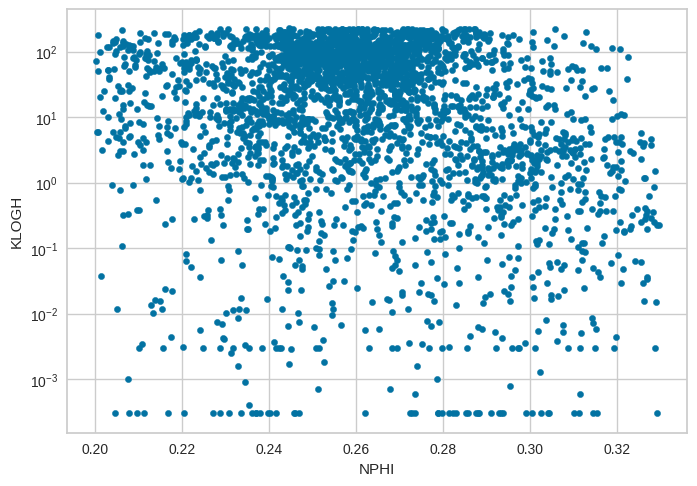

In [50]:
norne1.plot(kind="scatter", x="NPHI", y="KLOGH")
plt.yscale('log')
plt.grid(True)

tratamento de valores inconsistentes

In [15]:
# verificando valores inconsistentes.
norne1[norne1['KLOGH'] < 0]

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,


In [16]:
norne01 = norne1.drop(norne1[norne1['KLOGH'] < 0].index)
norne01

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,
3196.000,2575.1772,-2544.1772,86.6725,172.2732,96.6444,1.7680,0.2576,0.0771,2.5069,0.5073,0.4072,3.516686,1.769283
3196.125,2575.2207,-2544.2207,90.5224,171.0457,93.0198,0.6011,0.2458,0.0350,2.6117,0.9880,0.3669,3.367122,1.781980
3196.250,2575.2642,-2544.2642,91.7761,170.0313,91.9090,0.6303,0.2417,0.0369,2.6042,0.8607,0.3545,3.321126,1.792611
3196.375,2575.3079,-2544.3079,93.3359,169.1582,91.9182,0.8857,0.2404,0.0501,2.5733,0.7056,0.3546,3.265624,1.801864
3196.500,2575.3513,-2544.3513,93.9531,168.7450,92.3022,1.2757,0.2399,0.0643,2.5360,0.5439,0.3589,3.244172,1.806276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3882.375,2814.7883,-2783.7883,93.0182,167.9510,58.4511,422.6047,0.2140,0.2649,2.1890,0.6156,0.0010,3.276778,1.814815
3882.500,2814.8784,-2783.8784,92.4579,167.9510,69.3898,373.2987,0.2152,0.2621,2.1899,0.5570,0.0101,3.296636,1.814815
3882.625,2814.9683,-2783.9683,92.3088,167.9510,75.1288,404.5169,0.2169,0.2639,2.1847,0.5267,0.0113,3.301960,1.814815


Tratamento de valores faltantes

In [17]:
norne1.isnull()

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,
3196.000,False,False,False,False,False,False,False,False,False,False,False,False,False
3196.125,False,False,False,False,False,False,False,False,False,False,False,False,False
3196.250,False,False,False,False,False,False,False,False,False,False,False,False,False
3196.375,False,False,False,False,False,False,False,False,False,False,False,False,False
3196.500,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3882.375,False,False,False,False,False,False,False,False,False,False,False,False,False
3882.500,False,False,False,False,False,False,False,False,False,False,False,False,False
3882.625,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#verificando número de valores faltantes
norne1.isnull().sum()

TVD       0
TVDSS     0
DT        0
DTS       0
GR        0
KLOGH    11
NPHI      0
PHIF     11
RHOB      0
SW       11
VSH       0
VP        0
VS        0
dtype: int64

In [19]:
# vizualizando os campos nulos (NaN)
norne1.loc[pd.isnull(norne1['KLOGH'])]

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,
3272.625,2598.8499,-2567.8499,90.7226,137.8647,82.4329,NaN,0.3383,NaN,2.3080,NaN,0.2243,3.359692,2.210863
3272.750,2598.8801,-2567.8801,91.9061,139.3085,83.2717,NaN,0.3264,NaN,2.3102,NaN,0.2327,3.316428,2.187950
3272.875,2598.9104,-2567.9104,92.4143,140.3066,84.0445,NaN,0.3247,NaN,2.3143,NaN,0.2404,3.298191,2.172385
3273.000,2598.9407,-2567.9407,92.6227,140.1055,85.0350,NaN,0.3286,NaN,2.3174,NaN,0.2504,3.290770,2.175503
3273.125,2598.9712,-2567.9712,93.2428,139.3159,86.0942,NaN,0.3320,NaN,2.3162,NaN,0.2609,3.268885,2.187834
3273.250,2599.0015,-2568.0015,94.8469,139.8120,86.5667,NaN,0.3280,NaN,2.3086,NaN,0.2657,3.213600,2.180070
3273.375,2599.0317,-2568.0317,94.6540,138.0889,86.9182,NaN,0.3288,NaN,2.2897,NaN,0.2692,3.220149,2.207274
3273.500,2599.0620,-2568.0620,94.1266,137.8247,87.1049,NaN,0.3297,NaN,2.2814,NaN,0.2710,3.238192,2.211505
3273.625,2599.0923,-2568.0923,93.7465,144.0980,87.2514,NaN,0.3252,NaN,2.2919,NaN,0.2725,3.251321,2.115227


In [20]:
# preenchendo utilizando a média dos valores
norne1['KLOGH'].fillna(norne1['KLOGH'].mean(), inplace= True)

<ipython-input-20-8d695a6309e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norne1['KLOGH'].fillna(norne1['KLOGH'].mean(), inplace= True)


In [21]:
# checando se há valores faltantes.
norne1.loc[pd.isnull(norne1['KLOGH'])]

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,


In [22]:
norne1.loc[(norne1['KLOGH'] == 3272.625) | (norne1['KLOGH'] == 3272.750) | (norne1['KLOGH'] == 3272.875)]

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,


detecção de outliers


In [23]:
outlier_klogh = norne1[norne1['KLOGH'] > 866.4727]
outlier_klogh

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,
3222.500,2584.2083,-2553.2083,115.8430,181.1210,75.2883,901.3235,0.1774,0.3201,1.8706,0.1031,0.1047,2.631147,1.682853
3257.125,2594.7214,-2563.7214,111.1023,179.3893,80.4621,993.8894,0.1066,0.3004,1.9305,0.1396,0.0010,2.743418,1.699098
3257.250,2594.7559,-2563.7559,111.0355,180.6086,81.9910,998.4262,0.1083,0.3005,1.9303,0.1398,0.0010,2.745068,1.687627
3257.375,2594.7905,-2563.7905,110.2133,181.8360,83.5199,1004.5300,0.1100,0.3006,1.9300,0.1400,0.0010,2.765546,1.676236
3261.625,2595.9656,-2564.9656,97.3521,198.5316,72.1673,1146.6525,0.1957,0.3032,1.9154,0.1114,0.1217,3.130903,1.535272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881.000,2813.7996,-2782.7996,89.9904,167.9510,43.4897,2668.5510,0.2092,0.3059,2.1473,0.9925,0.0010,3.387028,1.814815
3881.125,2813.8894,-2782.8894,90.9705,167.9510,43.6672,1723.6592,0.2098,0.2962,2.1639,1.0000,0.0010,3.350537,1.814815
3881.250,2813.9792,-2782.9792,91.4388,167.9510,43.7215,1264.4072,0.2096,0.2893,2.1752,1.0000,0.0010,3.333377,1.814815


In [48]:
grafico = px.scatter(x = norne1['NPHI'], y = norne1['KLOGH'], log_y = True,
                     labels={
                     "y": "Permeabilidade",
                     "x": "Porosidade"
                 })
grafico.show()

In [25]:
detector = KNN()
detector.fit(norne1.iloc[:,5:6])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [26]:
#detectando outliers
previsoes = detector.labels_
previsoes
# 0 = ñ outliers   1 = outliers

array([0, 0, 0, ..., 0, 0, 1])

In [27]:
#fazendo contagem de outliers
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([4886,  543]))

In [28]:
#confiança das previsoes
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([0.016 , 0.0054, 0.0052, ..., 2.0381, 2.7186, 4.3479])

In [29]:
outliers = []
for i in range(len(previsoes)):
  #print(i)
  if previsoes[i] == 1:
    outliers.append(i)
print(outliers)

lista_outliers = norne1.iloc[outliers,:]
lista_outliers

[210, 213, 214, 225, 232, 233, 476, 477, 490, 525, 526, 532, 533, 534, 535, 2519, 2520, 2521, 2552, 2554, 2557, 2558, 2559, 2560, 2561, 2563, 2565, 2566, 2567, 2568, 2572, 2573, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2583, 2590, 2591, 2592, 2593, 2594, 2596, 2597, 2599, 2601, 2604, 2615, 2616, 2617, 2621, 2623, 2624, 2625, 2627, 2634, 2639, 2640, 2642, 2643, 2644, 2645, 2646, 2649, 2650, 2652, 2654, 2655, 2662, 2689, 2691, 2692, 2693, 2696, 2697, 2703, 2707, 2708, 2710, 2715, 2716, 2717, 2719, 2720, 2721, 2722, 2724, 2725, 2730, 2731, 2732, 2733, 2734, 2735, 2740, 2746, 2750, 2754, 2755, 2758, 2759, 2761, 2797, 2800, 2801, 2802, 2804, 2805, 2810, 2812, 2813, 2814, 2826, 2828, 2829, 2830, 2833, 2835, 2836, 2837, 2841, 2851, 2853, 2854, 2856, 2858, 2859, 2860, 2861, 2865, 2866, 2870, 2871, 2872, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2895, 2897, 2922, 2925, 2927, 2931, 2932, 2936, 2937, 2938, 2939, 2940, 2941, 2946, 2950, 2951, 2952, 2956, 2965, 2966, 2967, 2970, 2971, 2973, 2974, 

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH,VP,VS
DEPTH,,,,,,,,,,,,,
3222.250,2584.1282,-2553.1282,115.4097,184.0469,75.3841,456.3827,0.1673,0.2936,1.9391,0.1101,0.1072,2.641026,1.656100
3222.625,2584.2480,-2553.2480,116.6838,181.2552,73.7556,708.2061,0.1750,0.3107,1.8951,0.1053,0.1082,2.612188,1.681607
3222.750,2584.2881,-2553.2881,116.5465,182.2501,72.6896,696.6995,0.1722,0.3101,1.8968,0.1057,0.1027,2.615265,1.672427
3224.125,2584.7280,-2553.7280,118.3644,184.8087,73.8493,660.9063,0.1669,0.3080,1.9034,0.1108,0.0916,2.575099,1.649273
3225.000,2585.0081,-2554.0081,116.5828,176.4391,74.9290,703.8885,0.1801,0.3105,1.8984,0.1147,0.1164,2.614451,1.727508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881.250,2813.9792,-2782.9792,91.4388,167.9510,43.7215,1264.4072,0.2096,0.2893,2.1752,1.0000,0.0010,3.333377,1.814815
3881.500,2814.1592,-2783.1592,93.6238,167.9510,44.1914,641.6616,0.2131,0.2742,2.2000,1.0000,0.0010,3.255582,1.814815
3881.625,2814.2490,-2783.2490,94.2062,167.9510,43.5831,641.6482,0.2153,0.2742,2.2000,1.0000,0.0010,3.235456,1.814815


In [30]:
lista_outliers['NPHI'].min()

0.1056

In [31]:
lista_outliers['KLOGH'].min()

456.3827

<Axes: xlabel='KLOGH'>

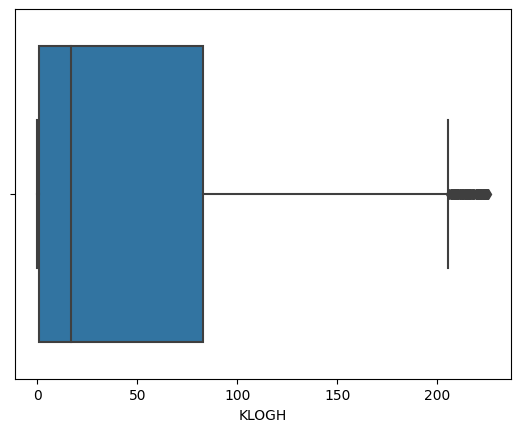

In [32]:
norne1 = norne1.drop(norne1[norne1['KLOGH'] > 226.3827].index)
sns.boxplot(data=norne1,x='KLOGH')

<Axes: xlabel='NPHI'>

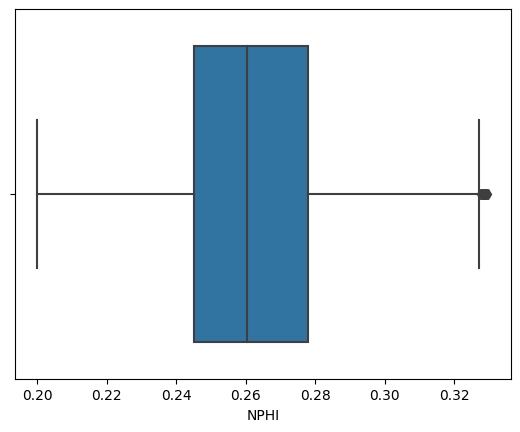

In [33]:
norne1 = norne1.drop(norne1[norne1['NPHI'] > 0.33].index)
norne1 = norne1.drop(norne1[norne1['NPHI'] < 0.20].index)
sns.boxplot(data=norne1,x='NPHI')

aplicando a Regressão linear

In [34]:
x_poro  = norne1.iloc[:, 6].values
x_poro

array([0.2576, 0.2458, 0.2417, ..., 0.2706, 0.2508, 0.2339])

In [35]:
y_perm = norne1.iloc[:, 5].values
y_perm

array([1.768 , 0.6011, 0.6303, ..., 0.0191, 0.099 , 1.3665])

In [36]:
np.corrcoef(x_poro, y_perm)

array([[ 1.        , -0.14397812],
       [-0.14397812,  1.        ]])

In [37]:
x_poro.shape

(3071,)

In [38]:
y_perm.shape

(3071,)

In [39]:
x_poro = x_poro.reshape(-1,1)
x_poro.shape

(3071, 1)

In [40]:
from sklearn.linear_model import LinearRegression
regressor_poro_perm = LinearRegression()
regressor_poro_perm.fit(x_poro, y_perm)

LinearRegression()

seguindo a equação y = b0 + b1 * x1

In [41]:
# b0
regressor_poro_perm.intercept_

141.23353277064507

In [42]:
# b1
regressor_poro_perm.coef_

array([-334.17798177])

In [43]:
#criando previsões
previsores = regressor_poro_perm.predict(x_poro)
previsores

array([55.14928467, 59.09258485, 60.46271458, ..., 50.8049709 ,
       57.42169494, 63.06930283])

In [44]:
x_poro.ravel()

array([0.2576, 0.2458, 0.2417, ..., 0.2706, 0.2508, 0.2339])

In [60]:
grafico = px.scatter(x = x_poro.ravel(), y = y_perm, labels={'x': 'Porosity', 'y': 'Permeability'}, log_y = True)
grafico.add_scatter(x = x_poro.ravel(), y = y_perm, name= 'regressão')
grafico.show()

In [46]:
# metrica para avaliar o quão bom é o algoritmo
regressor_poro_perm.score(x_poro, y_perm)

0.02072969879903641

representação do quanto os dados estão afastados da linha de regressão

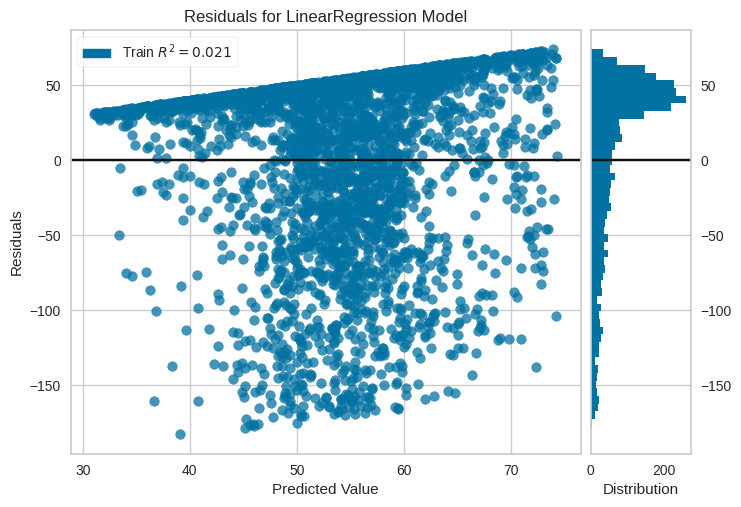

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
from yellowbrick import regressor
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_poro_perm)
visualizador.fit(x_poro, y_perm)
visualizador.poof()